## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

mouse_metadata.count()


Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [40]:
study_results = pd.read_csv(study_results_path)
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [41]:
# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
combined_dataset.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [42]:
combined_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice.
unique_mice = combined_dataset['Mouse ID'].value_counts().count()
print("number of mice : " , unique_mice)

number of mice :  249


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 



In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#find duplicate Mouse ID from duplicate dataset
combined_dataset_nodups = combined_dataset.drop_duplicates(subset=['Mouse ID','Timepoint'])
combined_dataset_nodups.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice in the clean DataFrame.
combined_dataset_nodups.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_grouped = combined_dataset_nodups.groupby("Drug Regimen")
drug_regimen_grouped.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [48]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = drug_regimen_grouped["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen_grouped["Tumor Volume (mm3)"].median()
tumor_volume_variance = drug_regimen_grouped["Tumor Volume (mm3)"].var()
tumor_volume_standard_dev = drug_regimen_grouped["Tumor Volume (mm3)"].std()
tumor_volume_sem = drug_regimen_grouped["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Tumor Volume Mean":tumor_volume_mean,
                             "Tumor Volume Median":tumor_volume_median,
                             "Tumor Volume Variance":tumor_volume_variance,
                             "Tumor Volume Standard Devivation":tumor_volume_standard_dev,
                             "Tumor Volume SEM":tumor_volume_sem})
summary_stats.head(20)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Devivation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of timepoints for all mice tested for each drug regimen')

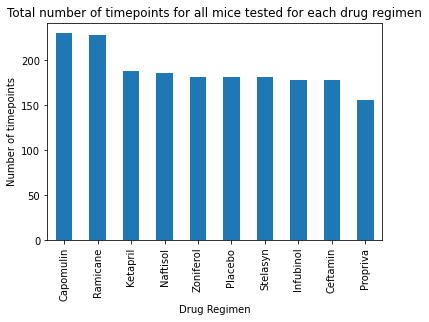

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar_plot = combined_dataset_nodups['Drug Regimen'].value_counts().plot.bar()

pandas_bar_plot.set_xlabel("Drug Regimen")
pandas_bar_plot.set_ylabel("Number of timepoints")
pandas_bar_plot.set_title("Total number of timepoints for all mice tested for each drug regimen")



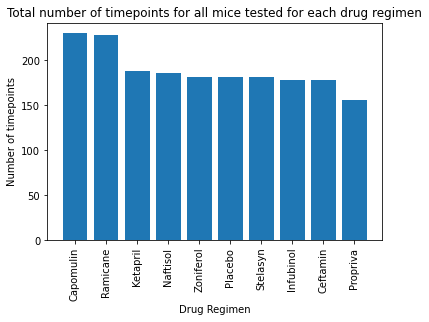

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen_count = combined_dataset_nodups["Drug Regimen"].value_counts()
drug_regimen_count
x_axis = np.arange(len(drug_regimen_count))

plt.bar(x_axis,drug_regimen_count)
plt.title('Total number of timepoints for all mice tested for each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of timepoints')
#x_axis
#drug_regimen_count.index.values
plt.xticks(x_axis,drug_regimen_count.index.values)
#rotate x-axis labels.
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:ylabel='Distribution of female versus male'>

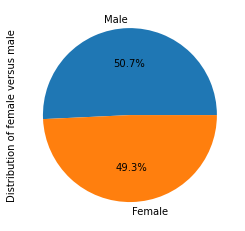

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_grouped_gender = combined_dataset_nodups["Sex"].value_counts()

mice_grouped_gender.plot.pie(autopct="%1.1f%%",ylabel='Distribution of female versus male')


Text(0.5, 1.0, 'Distribution of female versus male')

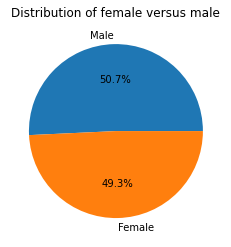

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data_gender = combined_dataset_nodups["Sex"].value_counts()

plt.pie(data_gender,autopct="%1.1f%%",labels=data_gender.index.values)
plt.title('Distribution of female versus male')

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment_regimes_list = ['Capomulin','Ramicane','Infubinol','Ceftamin' ]
four_treatment_regimes_data = combined_dataset_nodups[combined_dataset_nodups['Drug Regimen'].isin(four_treatment_regimes_list)]
four_treatment_regimes_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Start by getting the last (greatest) timepoint for each mouse
max_df = pd.DataFrame(four_treatment_regimes_data.groupby('Mouse ID')['Timepoint'].max().sort_values())
max_df_tp = max_df.rename(columns={'Timepoint':'greatest_timepoint'})
max_df_tp.head(20)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,greatest_timepoint
Mouse ID,
t573,0
u153,0
x226,0
b447,0
v339,5
m756,5
h531,5
w678,5
c326,5


In [56]:
treatment_merged_df = pd.merge(four_treatment_regimes_data,max_df_tp,on='Mouse ID')
treatment_merged_df .head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,greatest_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatment_regimes_list = ['Capomulin','Ramicane','Infubinol','Ceftamin' ]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in four_treatment_regimes_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df_temp = treatment_merged_df.loc[treatment_merged_df['Drug Regimen'] == drug]
    greatest_tumor_vol = df_temp.loc[df_temp['Timepoint'] == df_temp['greatest_timepoint'] ]

    # add subset 
    values = greatest_tumor_vol['Tumor Volume (mm3)']
    tumor_vol_data_list.append(values)
    iqrs = values.quantile([0.25,0.5,0.75])
    lower_quartiles = iqrs[0.25]
    upper_quartiles = iqrs[0.75]
    iqr = upper_quartiles -  lower_quartiles
    print(f'IQR  for  {drug} : {iqr}')
        
    # Determine outliers using upper and lower bounds
    lower_bounds = lower_quartiles - (1.5 * iqr)
    print(f'Lower bounds  for  {drug} : {lower_bounds}')
    upper_bounds = upper_quartiles - (1.5 * iqr)
    print(f'Upper bounds  for  {drug} : {upper_bounds}')
    
    outliers = (values.loc[(greatest_tumor_vol['Tumor Volume (mm3)'] >= upper_bounds)  |
                             (greatest_tumor_vol['Tumor Volume (mm3)'] <= lower_bounds)]).count()
    
    print(f'Number of  {drug} : {outliers}')
   # q75, q25 = np.percentile( df_temp['Tumor Volume (mm3)'], [75 ,25])
   # iqr = q75 - q25

    

IQR  for  Capomulin : 7.781863460000004
Lower bounds  for  Capomulin : 20.70456164999999
Upper bounds  for  Capomulin : 28.486425109999995
Number of  Capomulin : 22
IQR  for  Ramicane : 9.098536719999998
Lower bounds  for  Ramicane : 17.912664470000003
Upper bounds  for  Ramicane : 27.01120119
Number of  Ramicane : 24
IQR  for  Infubinol : 11.477135160000003
Lower bounds  for  Infubinol : 36.83290494999999
Upper bounds  for  Infubinol : 48.310040109999996
Number of  Infubinol : 22
IQR  for  Ceftamin : 15.577752179999997
Lower bounds  for  Ceftamin : 25.355449580000002
Upper bounds  for  Ceftamin : 40.93320176
Number of  Ceftamin : 25


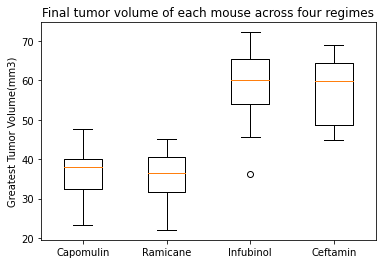

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data_list)

plt.title("Final tumor volume of each mouse across four regimes")
plt.ylabel("Greatest Tumor Volume(mm3)")
plt.xticks([1,2,3,4],four_treatment_regimes_list)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment for Mouse m601')

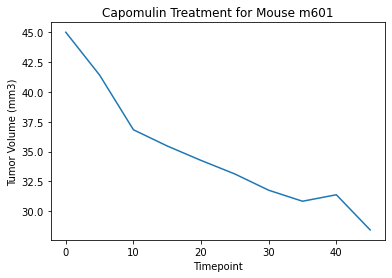

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m601 = treatment_merged_df.loc[treatment_merged_df['Mouse ID'] == 'm601']

plt.plot(m601['Timepoint'],m601['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Capomulin Treatment for Mouse m601')

,Mouse_weight,Tumor_vol
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


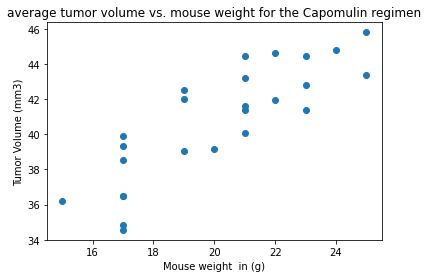

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df =  treatment_merged_df.loc[treatment_merged_df['Drug Regimen'] == 'Capomulin']

capomulin_mouse = capomulin_df.groupby(['Mouse ID']).agg(Mouse_weight=('Weight (g)', np.mean), Tumor_vol=('Tumor Volume (mm3)',np.mean) )

capomulin_mouse.head()

plt.scatter( capomulin_mouse['Mouse_weight'], capomulin_mouse['Tumor_vol'])

plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Mouse weight  in (g)")
plt.ylabel("Tumor Volume (mm3)")
capomulin_mouse.head()

## Correlation and Regression

The correclation between mouse weight and average tumor volumne for the Capomul regimen is 0.84
The r-squared is: 0.7088568047708723


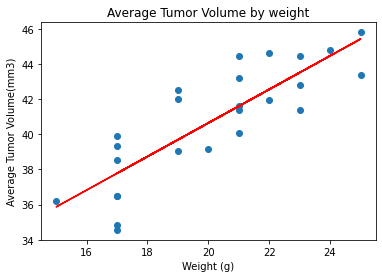

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#capomulin_df =  treatment_merged_df.loc[treatment_merged_df['Drug Regimen'] == 'Capomulin']

#capomulin_mouse = capomulin_df.groupby(['Mouse ID']).agg(Mouse_weight=('Weight (g)', np.mean), Tumor_vol=('Avg Tumor Volume (mm3)',np.mean) )

x_values = capomulin_mouse['Mouse_weight']
y_values = capomulin_mouse['Tumor_vol']

correlation = st.pearsonr(x,y)

print(f"The correclation between mouse weight and average tumor volumne for the Capomul regimen is {round(correlation[0],2)}")

#calculate liner regresssion
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plfot liner regressions
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title('Average Tumor Volume by weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()
